<a href="https://colab.research.google.com/github/zoikorda/Mass-Spring-Damper/blob/main/mass_spring_damper_1dof.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MASS SPRING DAMPER 1DOF**

(2, 301)
(1, 301)


Text(0.5, 1.0, 'System step response')

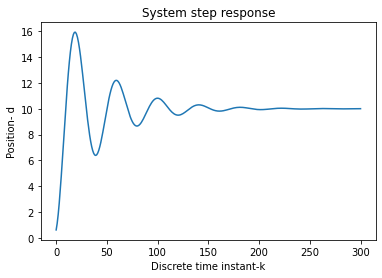

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
 
# define constants
c = 0.05
k = 0.1
m = 1

# define the continuous-time system matrices

A=np.matrix([[0, 1],[-k/m, -c/m]])
B=np.matrix([[0],[1/m]])
C=np.matrix([[1, 0]])

#define an initial state
x0=np.random.rand(2,1)

#print(A)
#print(B)
#print(C)
#print(x0)

#define the number of time-samples (time) and the sampling time for the discretization (sampling
time=300
sampling=0.5
 
#define an input sequence for the simulation
#input=np.random.rand(time,1)
input=np.ones(time)
#plt.plot(input_sequence)
 
 
# the following function uses the backward Euler method to simulate the state-space model
# input parameters:
#    - A,B,C              - continuous time system matrices 
#    - initial_state      - the initial state of the system 
#    - time_steps         - the total number of simulation time steps 
#    - sampling_period    - the sampling period for the backward Euler discretization 
# the function returns the state sequence and the output sequence which stored in vectors Xd, Yd respectively

def equation(A,B,C,initial_state,input_sequence, time_steps, sampling_period):
    I=np.identity(A.shape[0]) # identity matrix
    #print(I)
    A_dyn=inv(I-sampling_period*A)
    #print(Ad)
    B_dyn=A_dyn*sampling_period*B
    #print(Bd)
    X_dyn=np.zeros(shape=(A.shape[0],time_steps+1))
    Y_dyn=np.zeros(shape=(C.shape[0],time_steps+1))
    #print(Xd,Yd)
     
    for ii in range(0,time_steps):
       if ii==0:
           X_dyn[:,[ii]]=initial_state
           Y_dyn[:,[ii]]=C*initial_state
           x=A_dyn*initial_state+B_dyn*input_sequence[ii]
       else:
           X_dyn[:,[ii]]=x
           Y_dyn[:,[ii]]=C*x
           x=A_dyn*x+B_dyn*input_sequence[ii]
    X_dyn[:,[-1]]=x
    Y_dyn[:,[-1]]=C*x
    return X_dyn, Y_dyn
     
state,output=equation(A,B,C,x0,input, time ,sampling)
print(state.shape)
print(output.shape)
 
plt.plot(output[0,:])
plt.xlabel('Discrete time instant-k')
plt.ylabel('Position- d')
plt.title('System step response')

In [3]:
import numpy as np
import matplotlib.pyplot as plt
 
###############################################################################
#                   Model defintion
###############################################################################
 
# First, we need to define the system matrices of the state-space model:
# this is a continuous-time model, we will simulate it using the backward Euler method
c = 0.00001
k = 0.1
m = 1

A=np.matrix([[0, 1],[-k/m, -c/m]])
B=np.matrix([[0],[1/m]])
C=np.matrix([[1, 0]])


#define the number of time samples used for simulation and the discretization step (sampling)
time=200
sampling=0.5

In [5]:
###############################################################################
#                  Create the training data
###############################################################################
#define an input sequence for the simulation
input_seq_train=np.random.rand(time,1)
#define an initial state for simulation
x0_train=np.random.rand(2,1)
 
 
# here we simulate the dynamics
#from backward_euler import simulate
state,output_train=equation(A,B,C,x0_train,input_seq_train, time ,sampling)    
print(state.shape)

output_train=output_train.T
print(output_train.shape)
# this is the output data used for training
output_train=np.reshape(output_train,(1,output_train.shape[0],1))
 
input_seq_train=np.reshape(input_seq_train,(input_seq_train.shape[0],1))
print(input_seq_train.shape)
#print(np.zeros(shape=(input_seq_train.shape[0],1)).shape)
tmp_train=np.concatenate((input_seq_train, np.zeros(shape=(input_seq_train.shape[0],1))), axis=1)
print(tmp_train)
print(tmp_train.shape)
print(x0_train.T.shape)
tmp_train=np.concatenate((x0_train.T,tmp_train), axis=0)
# this is the input data used for training
trainX=np.reshape(tmp_train, (1,tmp_train.shape[0],tmp_train.shape[1]))

###############################################################################
#               Create the validation data
###############################################################################
# new random input sequence
input_seq_validate=np.random.rand(time,1)
# new random initial condition
x0_validate=np.random.rand(2,1)
 
# create a new ouput sequence by simulating the system 
state_validate,output_validate=equation(A,B,C,x0_validate,input_seq_validate, time ,sampling)    
output_validate=output_validate.T
# this is the output data used for validation
output_validate=np.reshape(output_validate,(1,output_validate.shape[0],1))
 
input_seq_validate=np.reshape(input_seq_validate,(input_seq_validate.shape[0],1))
tmp_validate=np.concatenate((input_seq_validate, np.zeros(shape=(input_seq_validate.shape[0],1))), axis=1)
tmp_validate=np.concatenate((x0_validate.T,tmp_validate), axis=0)
# this is the input data used for validation
validateX=np.reshape(tmp_validate, (1,tmp_validate.shape[0],tmp_validate.shape[1]))
###############################################################################
#               Create the test data
###############################################################################
# new random input sequence
input_seq_test=np.random.rand(time,1)
# new random initial condition
x0_test=np.random.rand(2,1)
 
# create a new ouput sequence by simulating the system 
state_test,output_test=equation(A,B,C,x0_test,input_seq_test, time ,sampling)    
output_test=output_test.T
# this is the output data used for test
output_test=np.reshape(output_test,(1,output_test.shape[0],1))
 
input_seq_test=np.reshape(input_seq_test,(input_seq_test.shape[0],1))
tmp_test=np.concatenate((input_seq_test, np.zeros(shape=(input_seq_test.shape[0],1))), axis=1)
tmp_test=np.concatenate((x0_test.T,tmp_test), axis=0)
# this is the input data used for test
testX=np.reshape(tmp_test, (1,tmp_test.shape[0],tmp_test.shape[1]))

(2, 201)
(201, 1)
(200, 1)
[[0.20297944 0.        ]
 [0.34273201 0.        ]
 [0.14602502 0.        ]
 [0.68646282 0.        ]
 [0.20155833 0.        ]
 [0.68693532 0.        ]
 [0.25146505 0.        ]
 [0.65614043 0.        ]
 [0.63895399 0.        ]
 [0.23884901 0.        ]
 [0.09096806 0.        ]
 [0.40980724 0.        ]
 [0.29266557 0.        ]
 [0.49581228 0.        ]
 [0.14782233 0.        ]
 [0.3346577  0.        ]
 [0.29213813 0.        ]
 [0.65968232 0.        ]
 [0.66422475 0.        ]
 [0.32869168 0.        ]
 [0.81664311 0.        ]
 [0.93113837 0.        ]
 [0.7772935  0.        ]
 [0.31736325 0.        ]
 [0.80861061 0.        ]
 [0.65451475 0.        ]
 [0.98535441 0.        ]
 [0.32270855 0.        ]
 [0.23110054 0.        ]
 [0.29543721 0.        ]
 [0.20152171 0.        ]
 [0.19905069 0.        ]
 [0.70079128 0.        ]
 [0.18454161 0.        ]
 [0.35964452 0.        ]
 [0.9851402  0.        ]
 [0.91902998 0.        ]
 [0.0627809  0.        ]
 [0.43310898 0.        

In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import GRU
from keras.layers import LSTM
from keras.layers import SimpleRNN
from tensorflow.keras.optimizers import RMSprop
from keras.layers import TimeDistributed
from keras.callbacks import ModelCheckpoint
 
model=Sequential()
model.add(LSTM(32, input_shape=(trainX.shape[1],trainX.shape[2]),return_sequences=True))
#model.add(Dense(1))
model.add(TimeDistributed(Dense(1)))  #there is no difference between this and model.add(Dense(1))...
model.compile(optimizer=RMSprop(), loss='mean_squared_error', metrics=['mse'])
 
 
# after every epoch, we save the model, this is the absolute path on my C: drive, so the path is
# C:\python_files\system_identification\models\
filepath="\\python_files\\system_identification\\models\\weights-{epoch:02d}-{val_loss:.6f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', period=1)
callbacks_list = [checkpoint]
history=model.fit(trainX, output_train , epochs=2000, batch_size=1, callbacks=callbacks_list, validation_data=(validateX,output_validate), verbose=2)
 
 
# load the model with the smallest validation loss
#model.load_weights("weights-1997-1.878475.hdf5")
 
# use the test data to predict the model response
testPredict = model.predict(testX)

Epoch 1/2000
1/1 - 3s - loss: 25.1686 - mse: 25.1686 - val_loss: 25.5085 - val_mse: 25.5085 - 3s/epoch - 3s/step
Epoch 2/2000
1/1 - 0s - loss: 24.4805 - mse: 24.4805 - val_loss: 24.9851 - val_mse: 24.9851 - 76ms/epoch - 76ms/step
Epoch 3/2000
1/1 - 0s - loss: 23.9700 - mse: 23.9700 - val_loss: 24.5153 - val_mse: 24.5153 - 86ms/epoch - 86ms/step
Epoch 4/2000
1/1 - 0s - loss: 23.5117 - mse: 23.5117 - val_loss: 24.0595 - val_mse: 24.0595 - 73ms/epoch - 73ms/step
Epoch 5/2000
1/1 - 0s - loss: 23.0672 - mse: 23.0672 - val_loss: 23.5908 - val_mse: 23.5908 - 70ms/epoch - 70ms/step
Epoch 6/2000
1/1 - 0s - loss: 22.6098 - mse: 22.6098 - val_loss: 23.0812 - val_mse: 23.0812 - 75ms/epoch - 75ms/step
Epoch 7/2000
1/1 - 0s - loss: 22.1123 - mse: 22.1123 - val_loss: 22.4964 - val_mse: 22.4964 - 77ms/epoch - 77ms/step
Epoch 8/2000
1/1 - 0s - loss: 21.5410 - mse: 21.5410 - val_loss: 21.7850 - val_mse: 21.7850 - 71ms/epoch - 71ms/step
Epoch 9/2000
1/1 - 0s - loss: 20.8455 - mse: 20.8455 - val_loss: 20.

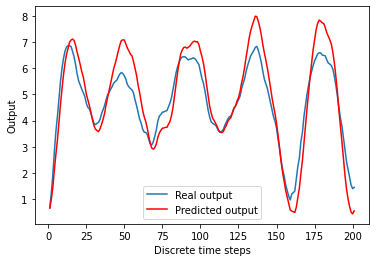

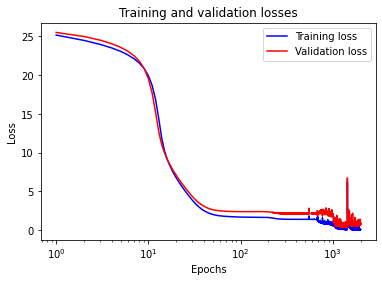

In [7]:
###############################################################################
#  Plot the predicted and "true" output and plot training and validation losses
###############################################################################
 
# plot the predicted and the "true" (test) outputs
time_plot=range(1,time+2)
plt.figure()
plt.plot(time_plot,testPredict[0,:,0], label='Real output')
plt.plot(time_plot,output_test[0,:],'r', label='Predicted output')
plt.xlabel('Discrete time steps')
plt.ylabel('Output')
plt.legend()
plt.savefig('LSTM_32.png')
plt.show()
 
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(loss)+1)
plt.figure()
plt.plot(epochs, loss,'b', label='Training loss')
plt.plot(epochs, val_loss,'r', label='Validation loss')
plt.title('Training and validation losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xscale('log')
#plt.yscale('log')
plt.legend()
plt.savefig('loss_LSTM_32.png')
plt.show()

In [10]:
model=Sequential()
model.add(GRU(32, input_shape=(trainX.shape[1],trainX.shape[2]),return_sequences=True))
#model.add(Dense(1))
model.add(TimeDistributed(Dense(1)))  #there is no difference between this and model.add(Dense(1))

model.compile(optimizer=RMSprop(), loss='mean_squared_error', metrics=['mse'])
 
 
# after every epoch, we save the model, this is the absolute path on my C: drive, so the path is
# C:\python_files\system_identification\models\
# The file names are defined according to the validation loss, in order to retrieve the model with the smallest validation loss.
# This should be the “best” model, which should be tested using the test data. 
filepath="\\python_files\\system_identification\\models\\weights-{epoch:02d}-{val_loss:.6f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', period=1)
callbacks_list = [checkpoint]
history=model.fit(trainX, output_train , epochs=2000, batch_size=1, callbacks=callbacks_list, validation_data=(validateX,output_validate), verbose=2)
 
 
# load the model with the smallest validation loss
#model.load_weights("weights-1997-1.878475.hdf5")
 
# use the test data to predict the model response
testPredict = model.predict(testX)

Epoch 1/2000
1/1 - 3s - loss: 25.9312 - mse: 25.9312 - val_loss: 26.3511 - val_mse: 26.3511 - 3s/epoch - 3s/step
Epoch 2/2000
1/1 - 0s - loss: 25.2874 - mse: 25.2874 - val_loss: 25.8790 - val_mse: 25.8790 - 81ms/epoch - 81ms/step
Epoch 3/2000
1/1 - 0s - loss: 24.8249 - mse: 24.8249 - val_loss: 25.4780 - val_mse: 25.4780 - 86ms/epoch - 86ms/step
Epoch 4/2000
1/1 - 0s - loss: 24.4320 - mse: 24.4320 - val_loss: 25.1143 - val_mse: 25.1143 - 88ms/epoch - 88ms/step
Epoch 5/2000
1/1 - 0s - loss: 24.0756 - mse: 24.0756 - val_loss: 24.7722 - val_mse: 24.7722 - 89ms/epoch - 89ms/step
Epoch 6/2000
1/1 - 0s - loss: 23.7402 - mse: 23.7402 - val_loss: 24.4426 - val_mse: 24.4426 - 84ms/epoch - 84ms/step
Epoch 7/2000
1/1 - 0s - loss: 23.4170 - mse: 23.4170 - val_loss: 24.1194 - val_mse: 24.1194 - 99ms/epoch - 99ms/step
Epoch 8/2000
1/1 - 0s - loss: 23.1001 - mse: 23.1001 - val_loss: 23.7983 - val_mse: 23.7983 - 80ms/epoch - 80ms/step
Epoch 9/2000
1/1 - 0s - loss: 22.7852 - mse: 22.7852 - val_loss: 23.

[[[0.56518173]
  [0.87081766]
  [1.2990956 ]
  [1.8513037 ]
  [2.4393353 ]
  [2.994709  ]
  [3.559668  ]
  [4.170856  ]
  [4.75999   ]
  [5.31352   ]
  [5.806758  ]
  [6.217771  ]
  [6.525635  ]
  [6.7720685 ]
  [6.8764796 ]
  [6.934839  ]
  [6.892654  ]
  [6.730247  ]
  [6.5018888 ]
  [6.281627  ]
  [6.050038  ]
  [5.8003707 ]
  [5.5846906 ]
  [5.288388  ]
  [4.973656  ]
  [4.746749  ]
  [4.5679355 ]
  [4.372544  ]
  [4.152307  ]
  [3.9410648 ]
  [3.82404   ]
  [3.8056145 ]
  [3.8097055 ]
  [3.9141488 ]
  [4.090555  ]
  [4.2798123 ]
  [4.4903913 ]
  [4.7539864 ]
  [4.977168  ]
  [5.2052445 ]
  [5.4061375 ]
  [5.607015  ]
  [5.803346  ]
  [5.9290304 ]
  [6.0652547 ]
  [6.208627  ]
  [6.3322544 ]
  [6.422658  ]
  [6.377117  ]
  [6.3266807 ]
  [6.130248  ]
  [5.9510407 ]
  [5.810588  ]
  [5.677277  ]
  [5.6038632 ]
  [5.4040523 ]
  [5.18887   ]
  [4.974566  ]
  [4.6656594 ]
  [4.4370527 ]
  [4.188812  ]
  [3.951883  ]
  [3.8039863 ]
  [3.744428  ]
  [3.6425056 ]
  [3.4303482 ]
  [3.22036

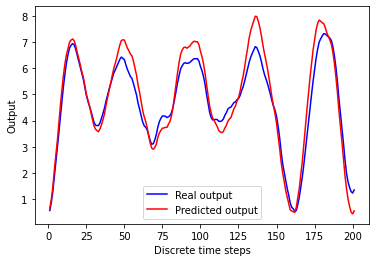

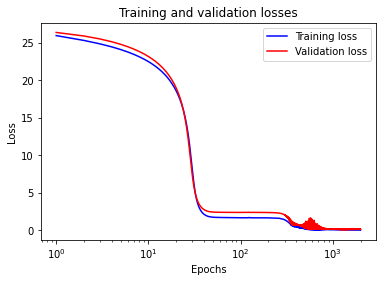

In [11]:
#------------------------------------------------------------------------------
#  Plot the predicted and "true" output and plot training and validation losses
#------------------------------------------------------------------------------

print(testPredict)

# plot the predicted and the "true" (test) outputs
time_plot=range(1,time+2)
plt.figure()
plt.plot(time_plot,testPredict[0,:,0],'b', label='Real output')
plt.plot(time_plot,output_test[0,:],'r', label='Predicted output')
plt.xlabel('Discrete time steps')
plt.ylabel('Output')
plt.legend()
plt.savefig('GRU_32.png')
plt.show()
 
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(loss)+1)
plt.figure()
plt.plot(epochs, loss,'b', label='Training loss')
plt.plot(epochs, val_loss,'r', label='Validation loss')
plt.title('Training and validation losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xscale('log')
plt.legend()
plt.savefig('loss_GRU_32.png')
plt.show()

In [14]:
model=Sequential()
model.add(SimpleRNN(4, input_shape=(trainX.shape[1],trainX.shape[2]),use_bias=False, activation='linear',return_sequences=True))
model.add(Dense(1, activation='linear', use_bias=False))
#model.add(TimeDistributed(Dense(1,activation="linear",use_bias=False)))  #there is no difference between this and model.add(Dense(1))...
model.compile(optimizer=RMSprop(), loss='mean_squared_error', metrics=['mse'])

# after every epoch, we save the model, this is the absolute path on my C: drive, so the path is
# C:\python_files\system_identification\models\
filepath="\\python_files\\system_identification\\models\\weights-{epoch:02d}-{val_loss:.6f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=True, save_weights_only=False, mode='auto', period=1)
callbacks_list = [checkpoint]
history=model.fit(trainX, output_train , epochs=4000, batch_size=1, callbacks=callbacks_list, validation_data=(validateX,output_validate), verbose=2)

# use the test data to predict the model response
testPredict = model.predict(testX)

Η έξοδος ροής περικόπηκε στις τελευταίες 5000 γραμμές.
1/1 - 0s - loss: 0.2414 - mse: 0.2414 - val_loss: 0.3784 - val_mse: 0.3784 - 46ms/epoch - 46ms/step
Epoch 1502/4000
1/1 - 0s - loss: 0.2435 - mse: 0.2435 - val_loss: 0.3739 - val_mse: 0.3739 - 57ms/epoch - 57ms/step
Epoch 1503/4000
1/1 - 0s - loss: 0.2398 - mse: 0.2398 - val_loss: 0.3762 - val_mse: 0.3762 - 49ms/epoch - 49ms/step
Epoch 1504/4000
1/1 - 0s - loss: 0.2419 - mse: 0.2419 - val_loss: 0.3717 - val_mse: 0.3717 - 53ms/epoch - 53ms/step
Epoch 1505/4000
1/1 - 0s - loss: 0.2382 - mse: 0.2382 - val_loss: 0.3741 - val_mse: 0.3741 - 53ms/epoch - 53ms/step
Epoch 1506/4000
1/1 - 0s - loss: 0.2403 - mse: 0.2403 - val_loss: 0.3695 - val_mse: 0.3695 - 56ms/epoch - 56ms/step
Epoch 1507/4000
1/1 - 0s - loss: 0.2366 - mse: 0.2366 - val_loss: 0.3719 - val_mse: 0.3719 - 42ms/epoch - 42ms/step
Epoch 1508/4000
1/1 - 0s - loss: 0.2388 - mse: 0.2388 - val_loss: 0.3673 - val_mse: 0.3673 - 52ms/epoch - 52ms/step
Epoch 1509/4000
1/1 - 0s - loss: 

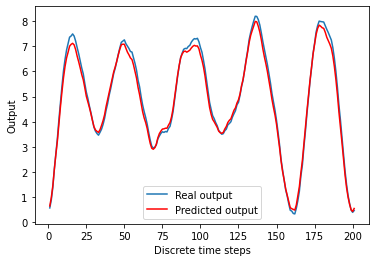

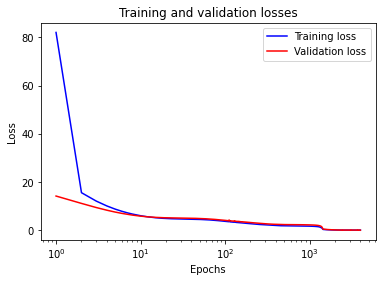

In [15]:
###############################################################################
#  Plot the predicted and "true" output and plot training and validation losses
###############################################################################
 
# plot the predicted and the "true" (test) outputs
time_plot=range(1,time+2)
plt.figure()
plt.plot(time_plot,testPredict[0,:,0], label='Real output')
plt.plot(time_plot,output_test[0,:],'r', label='Predicted output')
plt.xlabel('Discrete time steps')
plt.ylabel('Output')
plt.legend()
plt.savefig('responseLSTM32.png')
plt.show()
 
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(loss)+1)
plt.figure()
plt.plot(epochs, loss,'b', label='Training loss')
plt.plot(epochs, val_loss,'r', label='Validation loss')
plt.title('Training and validation losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xscale('log')
#plt.yscale('log')
plt.legend()
plt.savefig('lossLSTM32.png')
plt.show()